# Project 1 - Human Freedom Index Exploration and Analysis

Team 5: Andrew Zolintakis (azolinta) and Thara Palanivel (tpalaniv)

## Data

For our project on exploratory analysis we decided to take a look at two datasets. 

The first and main dataset we looked at is the Human Freedom Index.  This dataset was created by three organizations together, the Cato Institute, the Fraser Institute, and the Liberales Institut at the Friedrich Naumann Foundation. The dataset consists of 0-10 scores for 79 freedom indicators. Each indicator is considered as either a Peronsal Freedom or Economic Freedom, the Personal and Economic Freedom scores are then combined to come up with the overall Human Freedom index score. These index scores were created each year from 2008-2016 for 162 different countries. Not every country has a freedom score recorded fore each year. The dataset can be found here https://www.cato.org/human-freedom-index-new. 

The second dataset we looked at is the 2018 Democracy Index created by the Economist. This data consists of a 0-10 democracy score for 167 countries, as well as each country's system of government for the year 2018. The dataset can be found here https://en.wikipedia.org/wiki/Democracy_Index.

Note: When we capitalize Type of Freedom we are referring to the specific index in the data, otherwise we are just referring to the general idea of freedom.

## Initial thoughts

The data we are looking at has many insights into how prevalent different types of freedoms are around the world. It could be very influencial for governements and global organizations to guide their foreign and domestic policy.  

Since this data set has so many different indicators and we had limited time we wanted to see if we could answer some initial questions to guide our exploration.  

1) Which area's of the world have seen improvement and which areas have seen degradation of their Human Freedom score over the past 8 years.

2) What human freedom's have improved the most and deteriorated the most around the world.

3) Can we find correlations among the indices.

## Assumptions

We have one very important assumption: The organizations that created the index scores, created them systematically and without bias.

## First Look at Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load in the Data

In [2]:
df = pd.read_excel("hfi_data.xlsx", skiprows=4)
df.shape

(1458, 141)

In [3]:
df.head()

,Year,ISO Code,Countries,Region,HUMAN FREEDOM (Score),HUMAN FREEDOM (Rank),HUMAN FREEDOM (Quartile),Procedural Justice,Civil Justice,Criminal Justice,...,Bureaucracy costs,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation,ECONOMIC FREEDOM (Score),ECONOMIC FREEDOM (Rank),Column1
0,2016,ALB,Albania,Eastern Europe,7.56814,48,2,6.6615,4.54724,4.66651,...,6,9.71386,4.0502,7.32458,7.07437,6.70586,6.9069,7.54,34,7.366134
1,2016,DZA,Algeria,Middle East & North Africa,5.13589,155,4,-,-,-,...,1.77778,9.24307,3.76552,8.5235,7.02953,5.67696,5.26899,4.99,159,4.678702
2,2016,AGO,Angola,Sub-Saharan Africa,5.64066,142,4,-,-,-,...,1.33333,8.66463,1.94554,8.09678,6.78292,4.93027,5.5185,5.17,155,5.908814
3,2016,ARG,Argentina,Latin America & the Caribbean,6.46985,107,3,7.09848,5.79196,4.34393,...,6.66667,9.12236,3.26004,5.25341,6.50829,5.53583,5.36902,4.84,160,7.976513
4,2016,ARM,Armenia,Caucasus & Central Asia,7.2414,57,2,-,-,-,...,6,9.84647,4.57515,9.31961,6.49148,6.79753,7.37807,7.57,29,7.023814


In [4]:
df.columns

Index(['Year', 'ISO Code', 'Countries', 'Region', 'HUMAN FREEDOM (Score)',
       'HUMAN FREEDOM (Rank)', 'HUMAN FREEDOM (Quartile)',
       'Procedural Justice', 'Civil Justice', 'Criminal Justice',
       ...
       'Bureaucracy costs', 'Starting a  business',
       'Extra payments/bribes/favoritism', 'Licensing restrictions',
       'Tax compliance', 'Business regulations', 'Regulation',
       'ECONOMIC FREEDOM (Score)', 'ECONOMIC FREEDOM (Rank)', 'Column1'],
      dtype='object', length=141)

#### There many columns that have 'Index DATA' that we don't want to look at so we remove those. Also, for countries without a specific index score it has '-' value, lets replace those with nan values

In [5]:
keep_columns = [column for column in df.columns.values if 'DATA' not in column]
df =df[keep_columns]
df = df.replace('-', np.nan)
df.head()

,Year,ISO Code,Countries,Region,HUMAN FREEDOM (Score),HUMAN FREEDOM (Rank),HUMAN FREEDOM (Quartile),Procedural Justice,Civil Justice,Criminal Justice,...,Bureaucracy costs,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation,ECONOMIC FREEDOM (Score),ECONOMIC FREEDOM (Rank),Column1
0,2016,ALB,Albania,Eastern Europe,7.568140,48.0,2.0,6.661503,4.547244,4.666508,...,6.000000,9.713864,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.366134
1,2016,DZA,Algeria,Middle East & North Africa,5.135886,155.0,4.0,NaN,NaN,NaN,...,1.777778,9.243070,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,4.678702
2,2016,AGO,Angola,Sub-Saharan Africa,5.640662,142.0,4.0,NaN,NaN,NaN,...,1.333333,8.664627,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.908814
3,2016,ARG,Argentina,Latin America & the Caribbean,6.469848,107.0,3.0,7.098483,5.791960,4.343930,...,6.666667,9.122357,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,7.976513
4,2016,ARM,Armenia,Caucasus & Central Asia,7.241402,57.0,2.0,NaN,NaN,NaN,...,6.000000,9.846472,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.023814


#### We first just want to look at the main Human Freedom Score

Text(0.5, 0, 'Human Freedom Score')

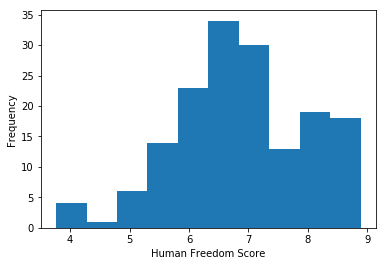

In [6]:
df[df['Year'] == 2016]['HUMAN FREEDOM (Score)'].plot(kind='hist')
plt.xlabel('Human Freedom Score')

In [7]:
df[df['Year'] == 2016]['HUMAN FREEDOM (Score)'].describe()

count    162.000000
mean       6.889871
std        1.079601
min        3.765827
25%        6.246463
50%        6.823996
75%        7.771945
max        8.887410
Name: HUMAN FREEDOM (Score), dtype: float64

In [8]:
print("2016 max human freedom score was " + str(round(df[df['Year'] == 2016]['HUMAN FREEDOM (Score)'].max(),2)) +
      " in " +  str(df.iloc[df[df['Year'] == 2016]['HUMAN FREEDOM (Score)'].idxmax()]['Countries']))
print("2016 min human freedom score was " + str(round(df[df['Year'] == 2016]['HUMAN FREEDOM (Score)'].min(),2)) +
      " in " +  str(df.iloc[df[df['Year'] == 2016]['HUMAN FREEDOM (Score)'].idxmin()]['Countries']))

2016 max human freedom score was 8.89 in New Zealand
2016 min human freedom score was 3.77 in Syria


#### As we can see from previous 3 cells, the distribution is centered at 6.89 and slightly skewed to the left.  The max score in 2016 was 8.88 in New Zealand and the min score was 3.77 in Syria.

In [9]:
print('Thee U.S. Human Freedom Score in 2016 was ' +
      str(round(df[(df['Year'] == 2016) & (df['Countries'] == 'United States')]['HUMAN FREEDOM (Score)'].values[0],2)) +
      ', which makes it ranked  ' + 
      str(int(df[(df['Year'] == 2016) & (df['Countries'] == 'United States')]['HUMAN FREEDOM (Rank)'].values[0])))

Thee U.S. Human Freedom Score in 2016 was 8.39, which makes it ranked  17


#### Next we will go into Tableau to help us visualize how the freedoms scores look across the globe.  We will look at the Overall Human Freedom score and rank, Economic Freedom score and rank, and Personal Freedom score and rank for all the countries in 2016.

<img src='Human_Freedom_2016_Score_and_Rank_Title.png'>

<img src="Economic_Freedom_2016_Score_and_Rank_Title.png">

<img src="Personal_Freedom_2016_Score_and_Rank_Title.png">

#### As we can see here, not suprisingly, the countries that are more devloped, European countries, Americas, Ausralia, are on the higher end of the spectrum for the freedom scores. On the hand, less developed countries and war ridden areas such as North Africa and the Middle East have lower freedom scores.

<img src="Human_Freedom_2016_Quartile_Title.png">

#### The 2016 Human Freedom rank split into quartiles is even more illustrative of differences around the world and the separation by regions between the most free countries and the least free countries.

## Index Score Changes

#### In order to see how index scores changed in countries over time, we need to manipulate our dataframe in order to get the change over time for each index for each country

In [10]:
country_grps = df.groupby('Countries')

#### Function to calculate the index score for a single country's score over time.

In [11]:
def calculate_index_change(s):
    '''Given a series with index score data,
    return the change from the first recorded year and the 2016 value. 
    Return Nan if no value before 2016'''
    if(s.name == 'Countries'):
        return 0
    try:
        value_2016 = s.values[0]
        value_early = np.NaN
        if(np.isnan(value_2016)):
            return 0
        index = 1
        while(index < len(s.values-1) and np.isnan(value_early)):
            value_early = s.values[-index]
            index+=1
        if(np.isnan(value_early)):
            return 0
        else:
            return value_2016-value_early
    except:
        return 0

In [12]:
def calculate_country_change(df):
    '''apply calculate_index_change to all series in dataframe'''
    return df.apply(calculate_index_change)

In [13]:
country_changes = country_grps.apply(calculate_country_change)
country_changes = country_changes.iloc[:,4:]
remove_rank_columns = [column for column in country_changes.columns.values if '(Rank)' not in column]
country_changes = country_changes[remove_rank_columns]
country_changes.head()

,HUMAN FREEDOM (Score),HUMAN FREEDOM (Quartile),Procedural Justice,Civil Justice,Criminal Justice,Rule of Law,Homicide,Disappearances,Violent Conflicts,Organised Conflicts,...,Administrative requirements,Bureaucracy costs,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation,ECONOMIC FREEDOM (Score),Column1
Countries,,,,,,,,,,,,,,,,,,,,,
Albania,0.069291,0.0,0.994836,-0.527541,0.565992,0.391752,0.163890,0.0,0.000000,0.0,...,2.104884,-0.688034,0.052522,-0.244131,2.503297,-0.190559,0.589663,0.609521,0.32,0.125396
Algeria,-0.017179,0.0,0.000000,0.000000,0.000000,-0.645881,-0.167392,0.0,2.535501,0.0,...,1.385205,-2.575456,0.240204,0.013361,1.590537,2.084935,0.456464,0.409270,-0.17,-0.230549
Angola,0.817134,0.0,0.000000,0.000000,0.000000,-0.360627,-0.197275,0.0,0.000000,0.0,...,1.084851,-3.060606,2.524053,-1.527106,3.609501,-0.168140,-0.562942,0.828896,0.76,1.327916
Argentina,-0.565272,1.0,0.765150,0.425376,0.000278,0.444791,0.626126,0.0,0.000000,0.0,...,-0.390201,4.166667,0.111860,-0.456955,0.110164,1.586120,0.854609,-0.040319,-1.04,-0.119823
Armenia,-0.213879,0.0,0.000000,0.000000,0.000000,0.143234,0.142899,0.0,0.000000,0.0,...,0.820832,0.852321,0.354031,0.831925,0.824470,3.004099,1.114613,0.349603,-0.02,0.032647


#### Now let's calculate the average change for each index globablly and look at what specific indices saw the greatest increases and decreases.

In [14]:
average_by_index = country_changes.mean(axis=0)
sorted_changes = average_by_index.sort_values()
print("Top 5 index decreases gloabally:")
for country, change in zip(sorted_changes[:5].index, sorted_changes[:5].values):
    print('\t',country, round(change,2))
print("\nTop 5 index increases gloabally:")
for country, change in zip(sorted_changes[-5:].index, sorted_changes[-5:].values):
    print('\t',country, round(change,2))

Top 5 index decreases gloabally:
	 Women's Movement -1.17
	 Inheritance Rights -1.1
	 Legal and Regulatory Restrictions -0.96
	 Private sector credit -0.77
	 Extra payments/bribes/favoritism -0.74

Top 5 index increases gloabally:
	 Bureaucracy costs 0.63
	 Starting a  business 0.67
	 Inflation: Most recent year 0.94
	 Licensing restrictions 1.36
	 Freedom of foreigners to visit 1.77


Text(0, 0.5, 'Score Change')

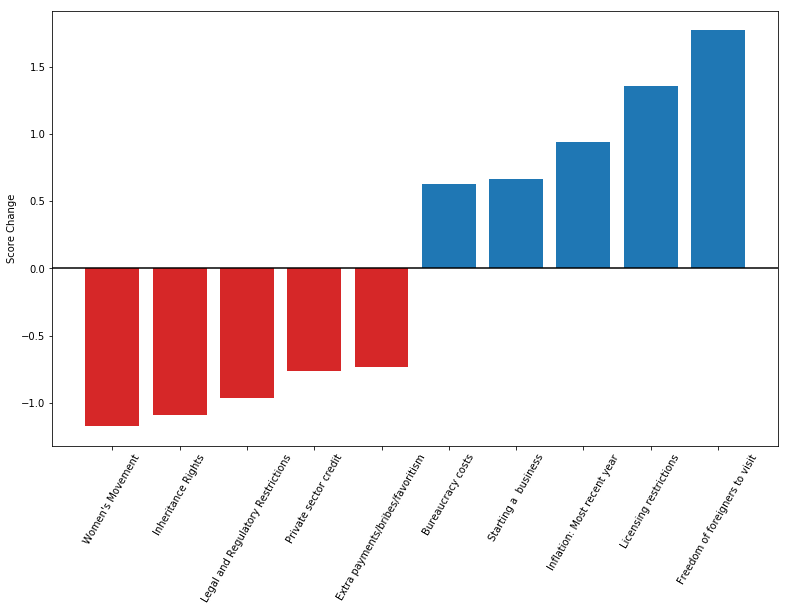

In [15]:
top_n = 5
high_low_indices = [i for i in range(top_n)] + [i for i in range(-top_n, 0)]
high_low_changes = sorted_changes[high_low_indices]
plt.figure(figsize=(13,8))
plt.bar(high_low_changes.index.values,high_low_changes.values, 
        color=['C0' if c > 0 else 'C3' for c in high_low_changes.values])
plt.xticks(rotation=60)
plt.axhline(0, color="black")
plt.ylabel('Score Change')

#### "Women's Movement" is the extent to which women can move outside of the home. It saw the largest decrease, so let's see which countries contributed to this decrease.

<img src="Womens_Movement_Score_Change.png">

#### Evidently, most of the world remained constant and a few countries saw drastic decreases. It seems many African and Middle Eastern countries saw the brunt of the deterioration, this could be due to the countries adopting more strict Islamic law. Specifically let's look at the change for Egypt, Syria and Niger which saw a 10 point decrease

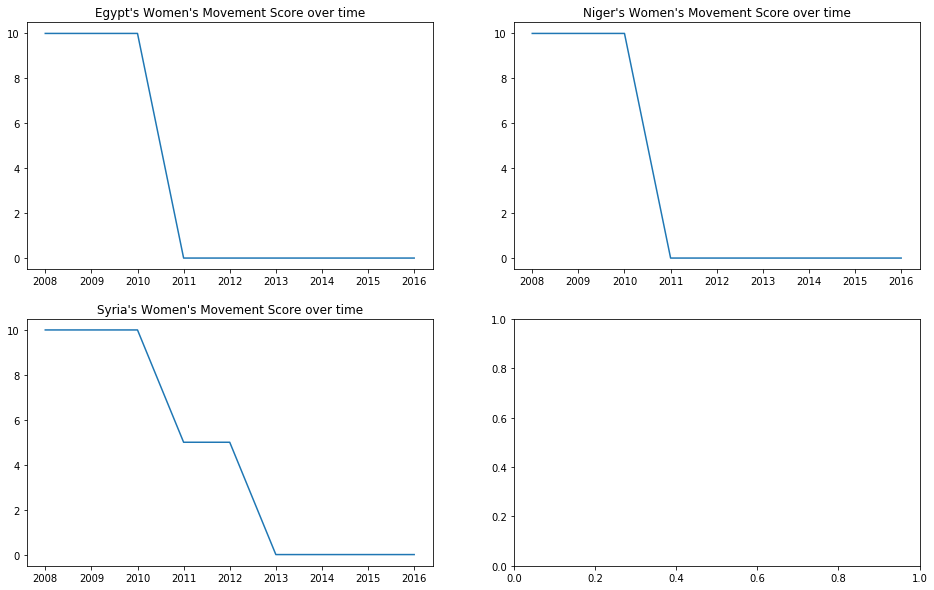

In [16]:
fig,ax = plt.subplots(2,2, figsize=(16,10))
ax[0,0].plot(df[df['Countries'] == 'Egypt']["Year"].values, df[df['Countries'] == 'Egypt']["Women's Movement"].values)
ax[0,0].set_title("Egypt's Women's Movement Score over time")
ax[0,1].plot(df[df['Countries'] == 'Niger']["Year"].values, df[df['Countries'] == 'Niger']["Women's Movement"].values)
ax[0,1].set_title("Niger's Women's Movement Score over time")
ax[1,0].plot(df[df['Countries'] == 'Syria']["Year"].values, df[df['Countries'] == 'Syria']["Women's Movement"].values)
ax[1,0].set_title("Syria's Women's Movement Score over time")
plt.show()

#### All three countries saw either a 5 or 10 point decrease in 2010. 2010 was when the Arab Spring occurred, which could have been the catalyst for this decrease.  Let's look at some other countries in the area to see if they saw a drop in 2010

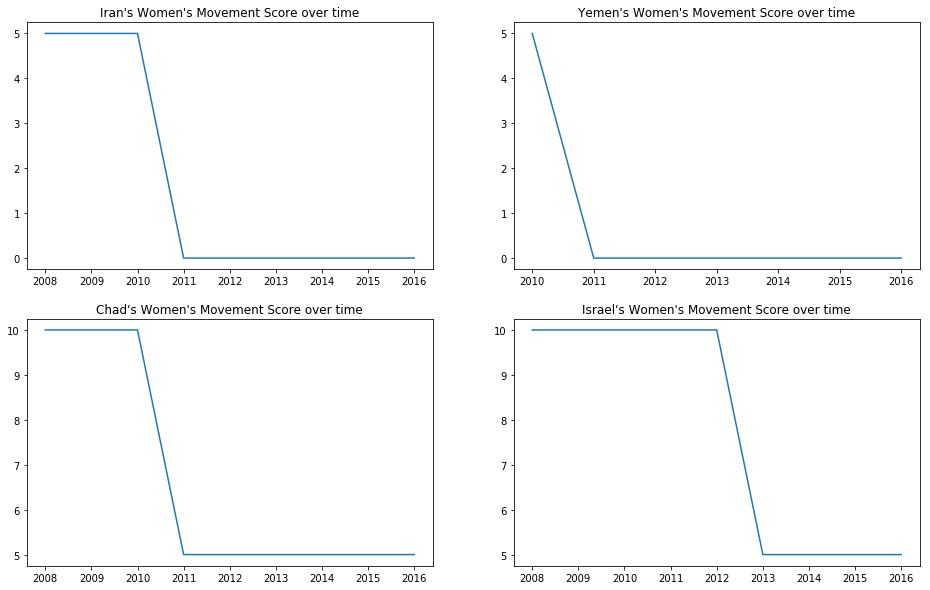

In [17]:
fig,ax = plt.subplots(2,2, figsize=(16,10))
ax[0,0].plot(df[df['Countries'] == 'Iran']["Year"].values, df[df['Countries'] == 'Iran']["Women's Movement"].values)
ax[0,0].set_title("Iran's Women's Movement Score over time")
ax[0,1].plot(df[df['Countries'] == 'Yemen, Rep.']["Year"].values, df[df['Countries'] == 'Yemen, Rep.']["Women's Movement"].values)
ax[0,1].set_title("Yemen's Women's Movement Score over time")
ax[1,0].plot(df[df['Countries'] == 'Chad']["Year"].values, df[df['Countries'] == 'Chad']["Women's Movement"].values)
ax[1,0].set_title("Chad's Women's Movement Score over time")
ax[1,1].plot(df[df['Countries'] == 'Israel']["Year"].values, df[df['Countries'] == 'Israel']["Women's Movement"].values)
ax[1,1].set_title("Israel's Women's Movement Score over time")
plt.show()

#### Here we see all of the countries we looked at saw significant decreases in 2010 except for Israel.  This supports our Arab Spring hypothesis because Israel is the only country where Islam is not the dominant religion.

#### Now let's look at change in the main indices

Text(0, 0.5, 'Score Change')

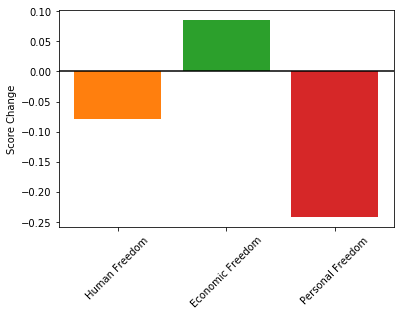

In [18]:
main_measures = ['HUMAN FREEDOM (Score)', 'ECONOMIC FREEDOM (Score)', 'PERSONAL FREEDOM (Score)']
plt.bar(['Human Freedom', 'Economic Freedom', 'Personal Freedom'], 
        average_by_index[main_measures].values, color=['C1', 'C2', 'C3'])
plt.xticks(rotation=45)
plt.axhline(0, color="black")
plt.ylabel('Score Change')

#### Similar to before, we would like to see how these freedoms changed by country

<img src="Human_Freedom_2008_2016_Change_Title.png">

<img src="Economic_Freedom_2008_2016_Change_Title.png">

<img src="Personal_Freedom_2008_2016_Change_Title.png">

#### What stands out here? Many Eastern countries saw siginificant increases in Economic Freedom and significant decreases in Personal Freedom.  This is unituitive, because economic freedom reduces the dependence of individuals on other groups, allowing individuals to more easily exercise other freedoms. This leads us into our next area of analysis, index score correlations.

## Correlations

#### As we explore this more, we bring in the democracy dataset. In this section we are looking at 2016 freedom data and 2018 democracy data.

In [19]:
democracy_df = pd.read_html("https://en.wikipedia.org/wiki/Democracy_Index")[2]
democracy_df.columns = democracy_df.iloc[0]
democracy_df =  democracy_df.reindex(democracy_df.index.drop([0,168]))
democracy_df = democracy_df.rename(columns={'Score':'Democracy Score'})[['Rank','Country', 'Democracy Score', 'Category']]
democracy_df['Democracy Score'] = democracy_df['Democracy Score'].astype(float)
democracy_df['Category'] = democracy_df['Category'].replace(np.NAN, 'unknown')
democracy_df.head()

,Rank,Country,Democracy Score,Category
1,1,Norway,9.87,Full democracy
2,2,Iceland,9.58,Full democracy
3,3,Sweden,9.39,Full democracy
4,4,New Zealand,9.26,Full democracy
5,5,Denmark,9.22,Full democracy


In [20]:
democracy_df.tail()

,Rank,Country,Democracy Score,Category
163,163,Chad,1.61,Authoritarian
164,164,Central African Republic,1.52,Authoritarian
165,165,Democratic Republic of the Congo,1.49,Authoritarian
166,166,Syria,1.43,Authoritarian
167,167,North Korea,1.08,Authoritarian


In [21]:
df = df.merge(democracy_df,how='left' ,left_on='Countries', right_on='Country')
df_2016  = df[df['Year']==2016]

In [22]:
regions = list(df['Region'].unique())
democracy_types = list(df['Category'].unique())[:4]

In [23]:
def plot_correlation_by_democracy(x_score, x_label, y_score, y_label, title, ax):
    '''Plot a scatter plot using x_score and y_score, with color denoting system of government'''
    for index, democracy_type in enumerate(democracy_types):
        x = df_2016[(df_2016['Category'] == democracy_type) & (df_2016[x_score] != np.NaN)][x_score]
        y =  df_2016[(df_2016['Category'] == democracy_type) & (df_2016[y_score]!= np.NaN)][y_score]
        color = 'C'+str(index)
        ax.scatter(x, y, alpha=0.3,
                        c=color, label=democracy_type)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(range(11))
    ax.set_yticks(range(11))
    ax.set_title(title)
    ax.legend(loc='lower left')

In [24]:
def plot_correlation_by_region(x_score, x_label, y_score, y_label, title, ax):
    '''Plot a scatter plot using x_score and y_score, with color denoting region of world'''
    for index, region in enumerate(regions):
        x = df_2016[(df_2016['Region'] == region) & (df_2016[x_score] != np.NaN)][x_score]
        y =  df_2016[(df_2016['Region'] == region) & (df_2016[y_score]!= np.NaN)][y_score]
        color = 'C'+str(index)
        ax.scatter(x, y, alpha=0.3,
                        c=color, label=region)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(range(11))
    ax.set_yticks(range(11))
    ax.set_title(title)
    ax.legend(loc='lower left')

In [25]:
regions = list(df['Region'].unique())
democracy_types = list(df['Category'].unique())[:4]

#### As we mentioned before, we would like to look at the correlation between Economic Freedom and Personal Freedom.

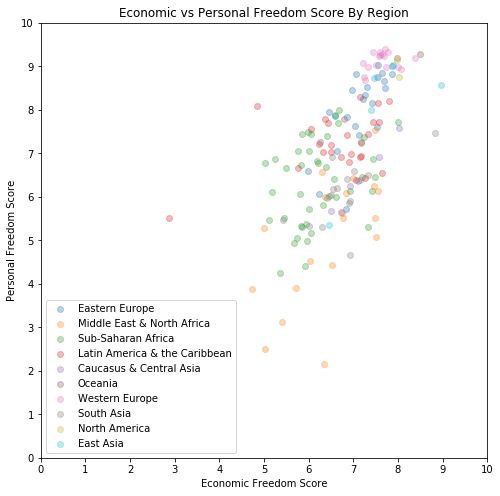

In [26]:
fig, axs = plt.subplots(1,1, figsize=(8,8))
plot_correlation_by_region('ECONOMIC FREEDOM (Score)', 'Economic Freedom Score',
                           'PERSONAL FREEDOM (Score)', 'Personal Freedom Score',
                           'Economic vs Personal Freedom Score By Region', axs)

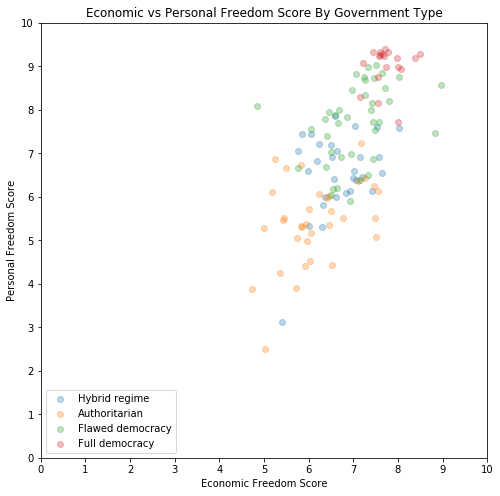

In [27]:
fig, axs = plt.subplots(1,1,figsize=(8,8))
plot_correlation_by_democracy('ECONOMIC FREEDOM (Score)', 'Economic Freedom Score',
                           'PERSONAL FREEDOM (Score)', 'Personal Freedom Score',
                           'Economic vs Personal Freedom Score By Government Type', axs)

#### We have plotted the relationship two times, once with color representing region and once with color representing type of government.  It looks like there is a positive correlation between Economic Freedom and Personal Freedom. But it may not be the same for each system of government.

Text(0.5, 1.0, 'Authoritarian Economic vs Personal Freedom Score')

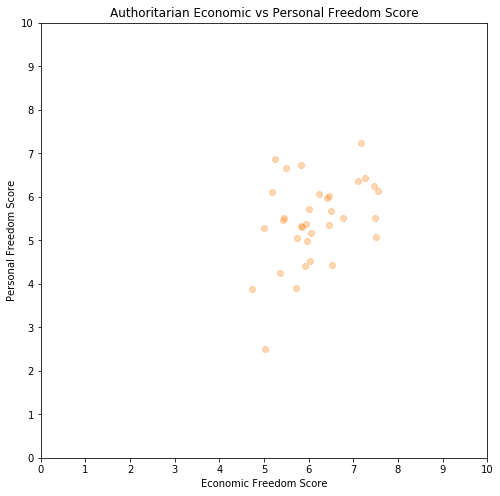

In [28]:
plt.figure(figsize=(8,8))
x = df_2016[(df_2016['Category'] == 'Authoritarian') 
            & (df_2016['ECONOMIC FREEDOM (Score)'] != np.NaN)]['ECONOMIC FREEDOM (Score)']
y =  df_2016[(df_2016['Category'] == 'Authoritarian') 
             & (df_2016['PERSONAL FREEDOM (Score)']!= np.NaN)]['PERSONAL FREEDOM (Score)']

plt.scatter(x, y, alpha=0.3,c='C1')
plt.xlabel('Economic Freedom Score')
plt.ylabel('Personal Freedom Score')
plt.xticks(range(11))
plt.yticks(range(11))
plt.title("Authoritarian Economic vs Personal Freedom Score")

<img src="Authoritarian.png">

#### Singling out the authoritarian regimes, we see there is almost no correlation between Economic Freedom and Personal Freedom.  And if we look at the Personal Freedom Change map from before with only countries with authoritarian governments highlighted, we can see that many of the countries that saw a simultaneous Economic Freedom increase and Personal Freedom decrease are authoritarian. It seems authoritarianism can be one explanation for the deviation from our intuition.

#### Since governement type seems to have an effect on the previous correlation, we are going to explore the relationship between democracy and freedom further.

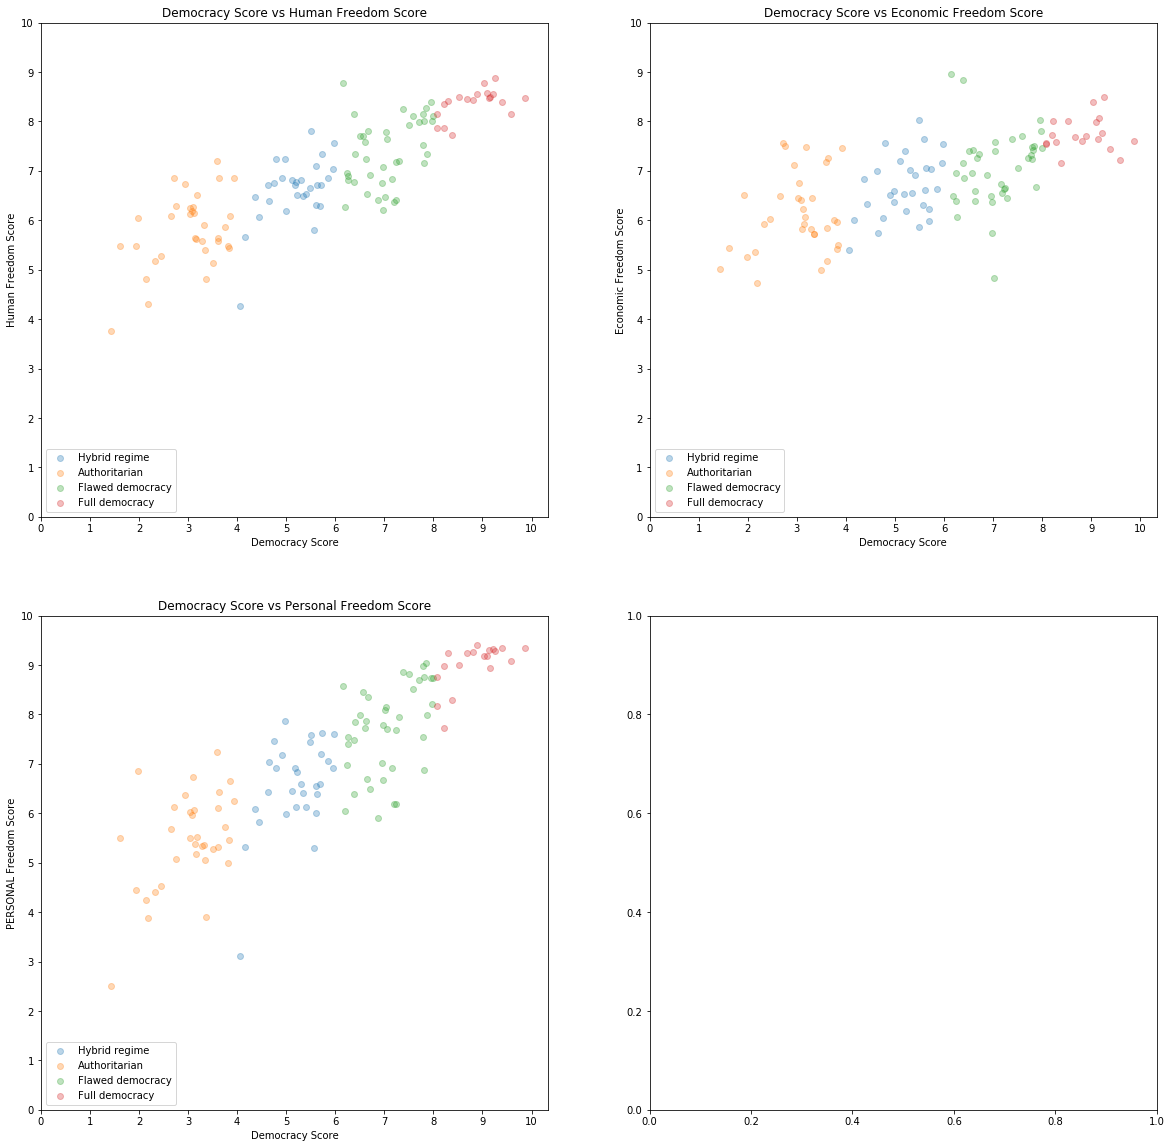

In [29]:
fig, axs = plt.subplots(2,2,figsize=(20,20))
plot_correlation_by_democracy('Democracy Score', 'Democracy Score', 
                           'HUMAN FREEDOM (Score)', 'Human Freedom Score',
                           'Democracy Score vs Human Freedom Score', axs[0,0])
plot_correlation_by_democracy('Democracy Score', 'Democracy Score', 
                           'ECONOMIC FREEDOM (Score)', 'Economic Freedom Score',
                           'Democracy Score vs Economic Freedom Score', axs[0,1])
plot_correlation_by_democracy('Democracy Score', 'Democracy Score', 
                           'PERSONAL FREEDOM (Score)', 'PERSONAL Freedom Score',
                           'Democracy Score vs Personal Freedom Score',axs[1,0])

#### After plotting the correlations, there clearly is a correlation between Democracy Score and freedom scores. The correlation seems much stronger with Personal Freedom, than with Economic Freedom, similar to what we found earlier.

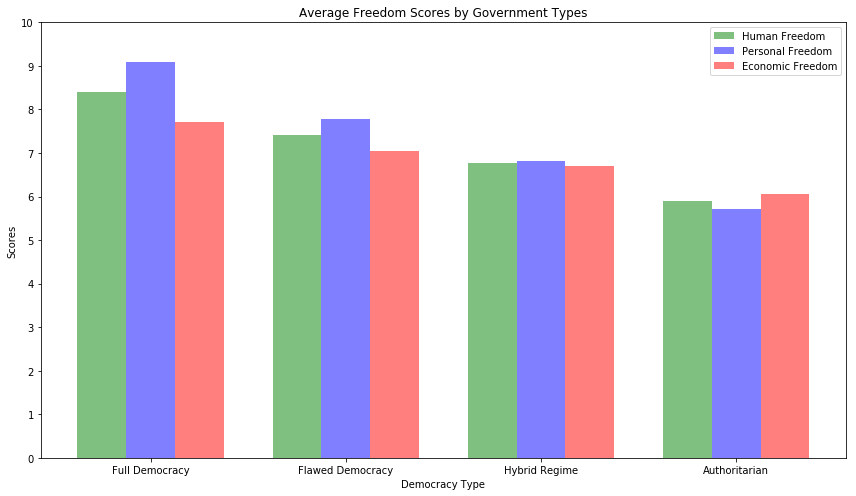

In [30]:
democracy_groups = df.groupby('Category')
n_groups = 4
index = np.arange(n_groups)
fig, axs = plt.subplots(figsize=(12,7))
bar_width = 0.25
opacity = 0.5

democracy_group_means_human = democracy_groups.mean()['HUMAN FREEDOM (Score)'].sort_values(ascending=False)
democracy_group_means_personal = democracy_groups.mean()['PERSONAL FREEDOM (Score)'].sort_values(ascending=False)
democracy_group_means_economic = democracy_groups.mean()['ECONOMIC FREEDOM (Score)'].sort_values(ascending=False)



rects1 = plt.bar(index, democracy_group_means_human.values, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Human Freedom')

rects2 = plt.bar(index + bar_width, democracy_group_means_personal.values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Personal Freedom')

rects3 = plt.bar(index + bar_width + bar_width, democracy_group_means_economic.values, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Economic Freedom')



plt.xlabel('Democracy Type')
plt.ylabel('Scores')
plt.title('Average Freedom Scores by Government Types')
plt.xticks(index + bar_width, ('Full Democracy', 'Flawed Democracy', 'Hybrid Regime', 'Authoritarian'))
plt.yticks(range(11)) 
plt.legend()

plt.tight_layout()
plt.show()

#### Additionally, looking at the bar graph of average freedom scores amongst the different systems of governments, we see Full Democracies average almost three points higher in Personal Freedom than Authoritarian governments, but only about 1.5 more points in Economic Freedom. 

#### Now while this positive correlation is quite interesting it most definitely cannot be looked at as a causation. One explaination for the association, could in fact be that being more democratic leads to more freedom. This would make sense, because democracy spreads control of the government to the people and implements checks and balances. This means people have more control over themselves and it is more difficult for any person or group to exert unwanted influence over an individual. 

#### However, a different explanation could be that higher freedoms are caused by countries being more developed.  Better infrastructre in terms of education, health care, safety, and things of this nature would most likely help individuals more freely exercise their rights. Since their low level life necessities are taken care of they can focus on other things to improve their lives, such as more political say.  In this second scenario, democracy is actually a symptom of having more freedom not the other way around. These two different explanations would greatly change how a government or organziation takes actions on this correlation.

#### In addition to the previous correlations, we believe that Rule of Law score and Security & Safety score could be good predictors of other freedoms.  These two scores indicate the infrastructure in place to protect the rights of individuals and the ability for them to exercise their rights.  They are both part of the Personal Freedom score, therefore, we will recalculate the Personal Freedom score without each one when comparing. We will also compare each to Economic Freedom Score.

In [31]:
df_2016['meanSS'] = df_2016[['Rule of Law', 'Movement', 'Religion', 'Association, Assembly, & Civil Society',
                   'Expression & Information','Identity & Relationships']].mean(axis=1)
df_2016['meanRL'] = df_2016[['Security & Safety', 'Movement', 'Religion', 'Association, Assembly, & Civil Society',
                   'Expression & Information','Identity & Relationships']].mean(axis=1)

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


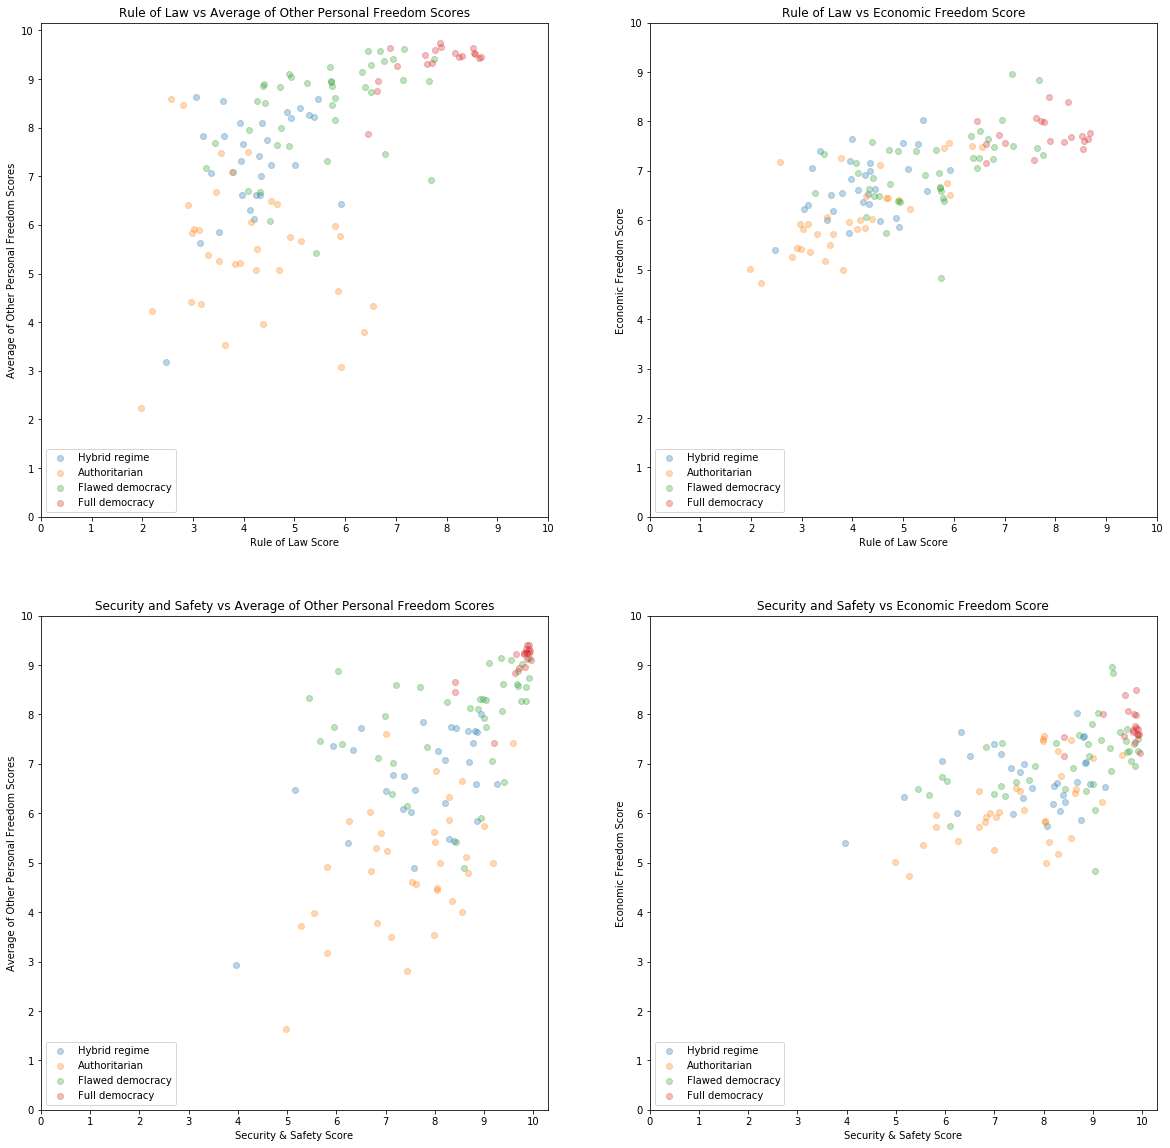

In [32]:
fig, axs = plt.subplots(2,2,figsize=(20,20))
plot_correlation_by_democracy('Rule of Law', 'Rule of Law Score', 
                           'meanRL', 'Average of Other Personal Freedom Scores',
                           'Rule of Law vs Average of Other Personal Freedom Scores', axs[0,0])
plot_correlation_by_democracy('Rule of Law', 'Rule of Law Score', 
                           'ECONOMIC FREEDOM (Score)', 'Economic Freedom Score',
                           "Rule of Law vs Economic Freedom Score", axs[0,1])
plot_correlation_by_democracy('Security & Safety', 'Security & Safety Score', 
                           'meanSS', 'Average of Other Personal Freedom Scores', 
                           'Security and Safety vs Average of Other Personal Freedom Scores', axs[1,0])
plot_correlation_by_democracy('Security & Safety', 'Security & Safety Score',
                           'ECONOMIC FREEDOM (Score)', 'Economic Freedom Score',
                           'Security and Safety vs Economic Freedom Score', axs[1,1])

#### As we can see here, neither Rule of Law nor Security & Safety score correlates strongly with the rest of the Personal Freedom index.  Additionally, Rule of Law has a decently strong correlation with Economic Freedom, which is not as evident for Security & Safety.

## Final Thoughts

After exploring the data we came away with two main insights. The first, is that personal freedoms are declining. Since 2008 the average Personal Freedom score declined by over 0.2 points.  This doesn't sound like much, but it is still in the opposite direction of where the world should be going.  What to do with this knowlege? It means the global organizations trying to improve the lives of global citizens may need to change their approaches and tactics. What would be really helpful would be to find out the leading causes of the decline so they can be fixed.

This leads us to our second finding. System of government has a high correlation with personal freedoms. The more democratic a country is, the more freedom they enjoy.

Applying this to what is going on in the world, there has been a rise of authoritarianism around the world, led by China. The Communist Party of China has become increasingly powerful and authoritarian. And as we saw, the Chinese people have seen a significant decline in Personal Freedom, however, the decline has been offset by a large increase in Economic Freedom. China's ability to become a global power has vindicated authoritarian regimes across the globe, and likely has caused a rise in authoritarianism and a decline in freedom (If we had more time, this is where we would have looked to next, the change in authoritarianism over time and its effect on freedom). With that being said, in history, authoritarian regimes have often collapsed due to pushing personal freedoms too low.  It will be interesting to see if China can continue their trend or if their restrictive governemnt is toppled.  If China does fail, this could lead to a democractic wave across the globe that could be a blessing for the freedoms of many global citizens.

Like we said at the start, this dataset could be very powerful in guiding the policies of global organizations and governments, our three week exploration was just a drop in the bucket of insights the Human Freedom Index has to offer.